In [1]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

In [2]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

In [3]:
def visualize_data(data):
    points = data
    plt.scatter(points[:, 0], points[:, 1])
    plt.show()

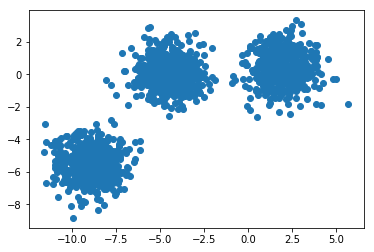

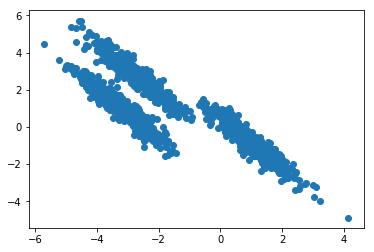

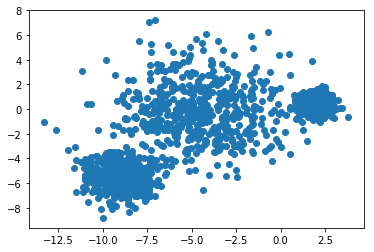

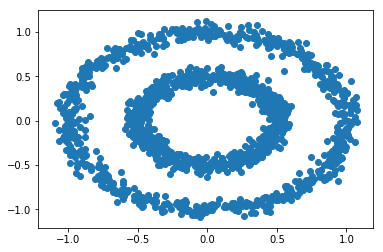

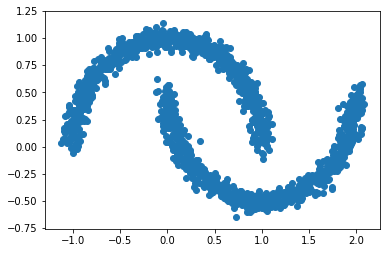

In [4]:
visualize_data(X)
visualize_data(X_aniso)
visualize_data(varied[0])
visualize_data(noisy_circles[0])
visualize_data(noisy_moons[0])

## Test Set 1

Test how autoclustering algorithm behaves for each individual clustering alg on the set of test datasets

In [5]:
from autocluster import AutoCluster
from algorithms import algorithms

In [6]:
datasets = [
    noisy_circles,
    noisy_moons,
    varied,
    aniso,
    blobs,
    no_structure]

clustering_algorithms = [ #list of strings
        'MiniBatchKMeans',
        'KMeans',
        'AffinityPropagation',
        'MeanShift',
        'SpectralClustering',
        'AgglomerativeClustering',
        'DBSCAN',
        'OPTICS',
        'Birch'
        #('GaussianMixture', gmm)
    ]

Configuration space object:
  Hyperparameters:
    algorithm_choice, Type: Categorical, Choices: {MiniBatchKMeans}, Default: MiniBatchKMeans
    batch_size___MiniBatchKMeans, Type: UniformInteger, Range: [10, 1000], Default: 100
    n_clusters___MiniBatchKMeans, Type: UniformInteger, Range: [1, 20], Default: 10
  Conditions:
    batch_size___MiniBatchKMeans | algorithm_choice in {'MiniBatchKMeans'}
    n_clusters___MiniBatchKMeans | algorithm_choice in {'MiniBatchKMeans'}

Optimization is complete.
Took 8.28242826461792 ms, the optimal configuration is 
Configuration:
  algorithm_choice, Value: 'MiniBatchKMeans'
  batch_size___MiniBatchKMeans, Value: 633
  n_clusters___MiniBatchKMeans, Value: 3



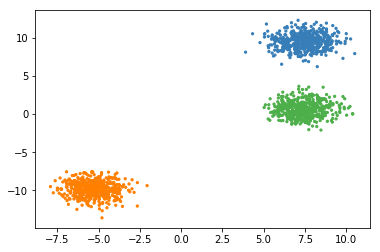

time taken 29.93s


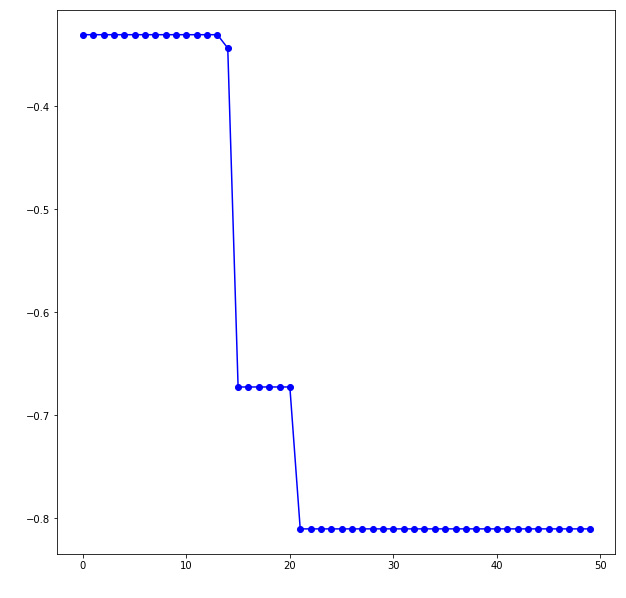

In [20]:
X, y = blobs

t0 = time.time()
        
autocluster = AutoCluster()
       
autocluster.fit(X,['MiniBatchKMeans'],50)

t1 = time.time()
        
y_pred = autocluster.predict(X)
print('time taken ' + str(('%.2fs' % (t1 - t0)).lstrip('0')))
autocluster.plot_convergence()

In [9]:
t0 = time.time()
        
autocluster = AutoCluster()
       
autocluster.fit(X,['KMeans'],10)

t1 = time.time()
        
y_pred = autocluster.predict(X)
print('time taken ' + str(('%.2fs' % (t1 - t0)).lstrip('0')))
autocluster.plot_convergence()

Configuration space object:
  Hyperparameters:
    algorithm_choice, Type: Categorical, Choices: {KMeans}, Default: KMeans
    n_clusters___KMeans, Type: UniformInteger, Range: [1, 20], Default: 10
  Conditions:
    n_clusters___KMeans | algorithm_choice in {'KMeans'}



KeyboardInterrupt: 

Configuration space object:
  Hyperparameters:
    algorithm_choice, Type: Categorical, Choices: {DBSCAN}, Default: DBSCAN
    eps___DBSCAN, Type: UniformFloat, Range: [0.01, 5.0], Default: 0.01
    min_samples___DBSCAN, Type: UniformInteger, Range: [5, 100], Default: 5
  Conditions:
    eps___DBSCAN | algorithm_choice in {'DBSCAN'}
    min_samples___DBSCAN | algorithm_choice in {'DBSCAN'}

Optimization is complete.
Took 2.4762401580810547 ms, the optimal configuration is 
Configuration:
  algorithm_choice, Value: 'DBSCAN'
  eps___DBSCAN, Value: 0.30994186785144257
  min_samples___DBSCAN, Value: 56



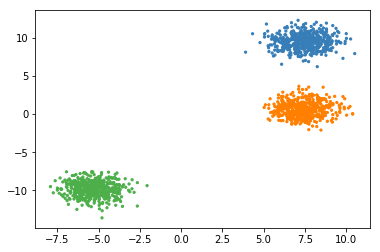

time taken 8.29s


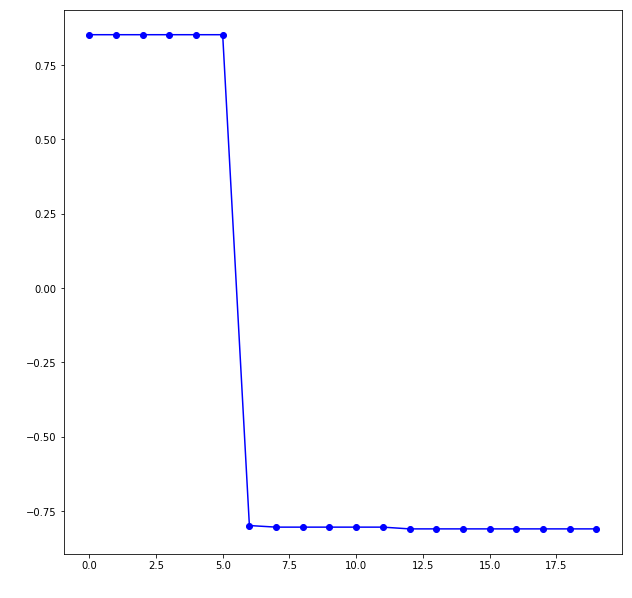

In [25]:
t0 = time.time()
        
autocluster = AutoCluster()
       
autocluster.fit(X,['DBSCAN'],20, seed=2)

t1 = time.time()
        
y_pred = autocluster.predict(X)
print('time taken ' + str(('%.2fs' % (t1 - t0)).lstrip('0')))
autocluster.plot_convergence()

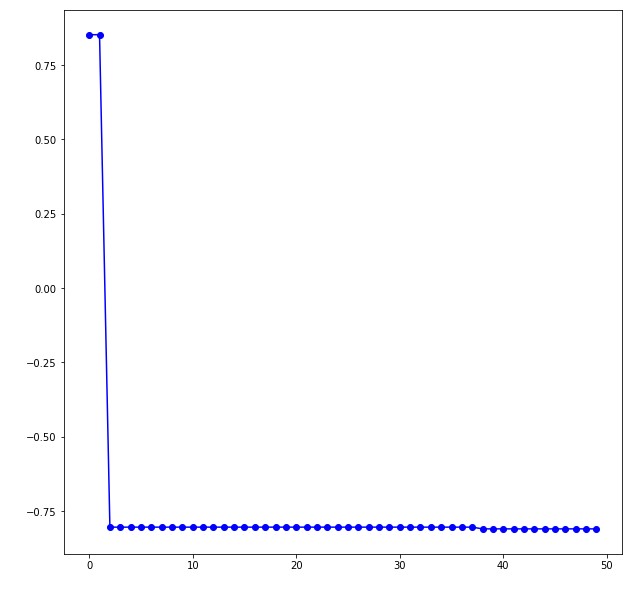